In [1]:
import numpy as np

In [3]:
# 농어 길이
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
# 농어 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, 
                                                                      random_state=42, test_size=0.25, 
                                                                      shuffle=True)
print(len(train_input), len(train_target), len(test_input), len(test_target))

42 42 14 14


In [6]:
# input 데이터 2차원으로 변환
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [7]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3).fit(train_input, train_target)
knr.score(test_input, test_target)

0.9746459963987609

In [12]:
# from sklearn.metrics import mean_absolute_error
pred = knr.predict([[50]])
pred

array([1033.33333333])

In [20]:
knr.kneighbors([[50]])

(array([[6., 7., 7.]]), array([[34,  8, 14]], dtype=int64))

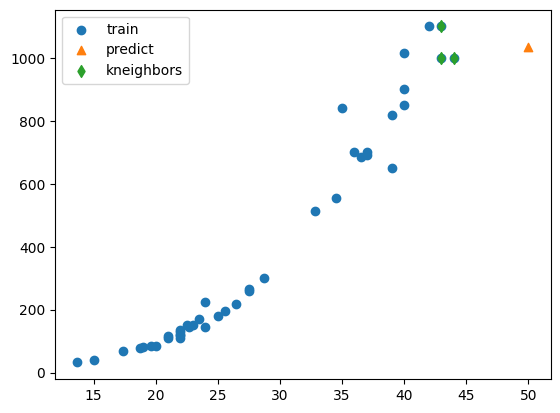

In [22]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target,label="train")
plt.scatter(50, pred, label="predict", marker="^")
plt.scatter(train_input[indexes], train_target[indexes], label="kneighbors", marker="d")
plt.legend()
plt.show()

In [23]:
knr.predict([[100]])

array([1033.33333333])

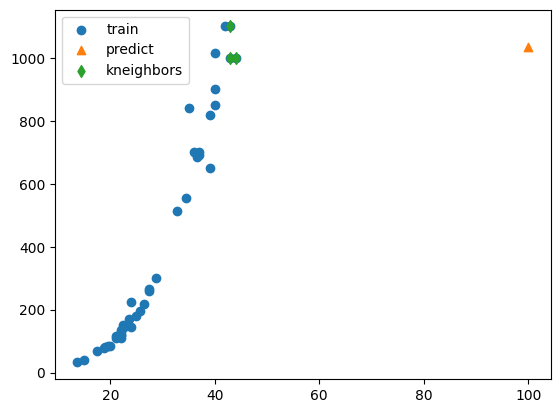

In [24]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target,label="train")
plt.scatter(100, knr.predict([[100]]), label="predict", marker="^")
plt.scatter(train_input[indexes], train_target[indexes], label="kneighbors", marker="d")
plt.legend()
plt.show()

In [ ]:
"""
KNN의 단점
- 데이터가 범위를 벗어나도 이웃하는 가장 가까운 데이터들의 평균값을 반환하기 때문에 예측에 한계가 있음
"""

# 선형회귀(linear regression)

In [ ]:
"""
- 널리 사용되는 대표적인 회귀 알고리즘
- 비교적 간단하고, 성능이 뛰어나기 때문에 회귀모델 수행 시 초반에 주로 진행
- 선형회귀의 역할: 하나의 특성을 가장 잘 나타내는 직선(추세선)을 찾아내는 것
- 훈련(fit), 평가(score), 예측(predict) 함수는 모두 기존과 동일함
"""

In [25]:
# 선형회귀 모델 라이브러리 불러들이기
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(train_input, train_target)

LinearRegression()

In [30]:
print(lr.predict([[50], [100]]))

[1241.83860323 3192.69585141]


In [31]:
"""
선형회귀 모델의 기울기와 절편 확인하기
- 선형회귀모델: y = a*x + b
- a: 기울기, b: 절편
"""
print("기울기: ", lr.coef_, "/ 절편: ", lr.intercept_)

기울기:  [39.01714496] / 절편:  -709.0186449535477


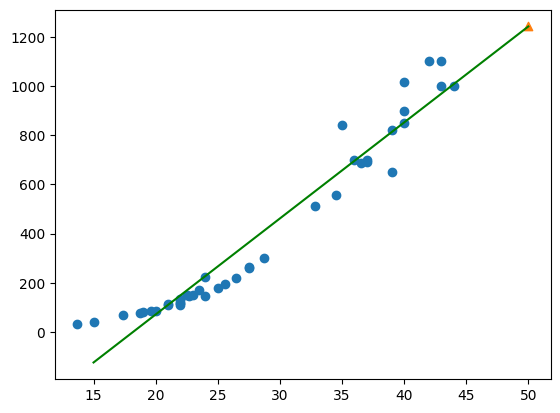

In [33]:
"""
산점도 그리기
- 훈련데이터, 50길이, 추세선 모두 그리기
"""
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.scatter(50, lr.predict([[50]]), marker="^")

# x축의 시작점과 끝점 = [15, 50]
plt.plot([15, 50], [lr.coef_ * 15 + lr.intercept_, 
                 lr.coef_*50 + lr.intercept_], c="g")

In [ ]:
"""
해석
- 추세선에 가까울수록 예측력이 좋은 모델
"""

In [34]:
# 과적합 여부 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
"""
train과 test의 정확도가 0.11정도 차이
--> 다소 과대적합이 보이지만 사용해도 될 정도의 훈련모델임
"""

0.939846333997604
0.8247503123313558


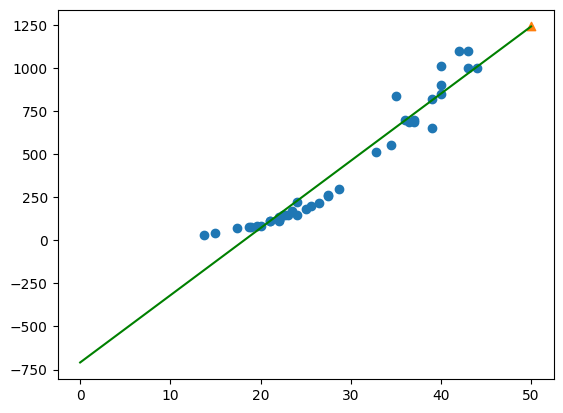

In [35]:
"""
산점도 그리기
- 훈련데이터, 50길이, 추세선 모두 그리기
"""
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.scatter(50, lr.predict([[50]]), marker="^")

# x축의 시작점과 끝점 = [0, 50]
plt.plot([0, 50], [lr.coef_ * 0 + lr.intercept_, 
                 lr.coef_*50 + lr.intercept_], c="g")

# 다항회귀

In [37]:
"""
같은 선형모델에 거듭제곱 값을 넣어줘야함
--> x의 제곱 값, x값 2개가 필요
target값은 건들일 필요X
"""
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)
train_poly

(42, 2) (14, 2)


array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [38]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [39]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278304


In [40]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


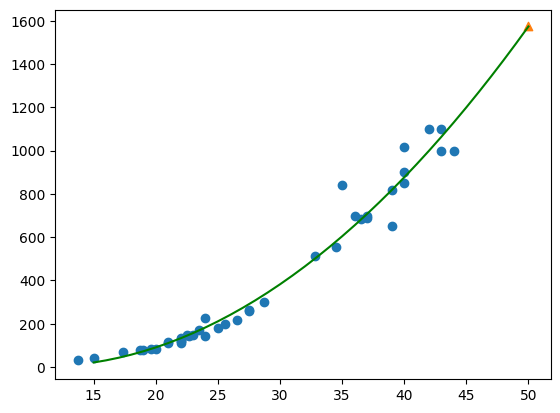

In [45]:
"""
산점도 그리기
- 훈련데이터, 50길이, 추세선 모두 그리기
"""
import matplotlib.pyplot as plt

point = np.arange(15, 51)

plt.scatter(train_input, train_target)
plt.scatter([50], lr.predict([[50**2, 50]]), marker="^")

# x축의 시작점과 끝점 = [0, 50]
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_, c="g")

In [47]:
# 과적합 여부 확인
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
"""
0.003정도의 과소적합 --> 사용할수는 있지만 대안이 있는지 확인 필요
- 데이터 양 늘리기
- 복잡도 늘리기
선형회귀모델에서는 복잡도를 늘리기 위해 여러개의 특성(=독립변수=컬럼)을 생성해서 사용

특성 공학: 특성을 늘림
- 다중회귀 분석 수행, 여러개의 독립변수
"""

0.9706807451768623
0.9775935108325122
